>[FFC simulator](#scrollTo=6oHCPaQG_NLT)

>>[User-defined inputs](#scrollTo=tYBMDEO7PmcJ)

>>[Import data and libraries](#scrollTo=-uB8QCg7_Ssm)

>>[Build FFC system and plot response](#scrollTo=gCU4qPYS_W5J)

>>[Calculate and plot error](#scrollTo=JX2ea2F__eK8)

>[System response to sine wave](#scrollTo=oVI82coyPB6M)

>>[User-defined inputs](#scrollTo=bLk4vTt6o5j6)

>>[Code and output plot](#scrollTo=Vq_RafokqBif)

>[Bode plots](#scrollTo=r2z5hpkk5qXS)

>>[Bode plot (rad/s x-axis)](#scrollTo=2MKk7djmPNi_)

>>[Bode plot (Hz x-axis)](#scrollTo=VuPEiO7zPTiL)



# FFC simulator

## User-defined inputs

CHANGE THESE TO VISUALISE DIFFERENT CATHETER PRESSURE RESPONSE TO BOTH SINE WAVE AND HEART BEAT DATA. ALSO GENERATES BODE PLOTS

In [ ]:
# Parameters for the second order system
damping_ratio = 0.76
natural_frequency = 6.41  # Hz

## Import data and libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import lti, lsim, bode
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, minimize

# Load heartbeat
file_name = 'May03 clean IABC data.xlsx'  # Drop IABC data into runtime by clicking folder icon and uploading data
sampling_rate = 250  # Hz

# Load data from Excel
data = pd.read_excel(file_name)
time = data['Time'].values
waveform = data['Waveform'].values

# Ensure the time and waveform arrays are numpy arrays
time = np.array(time)
waveform = np.array(waveform)

## Build FFC system and plot response

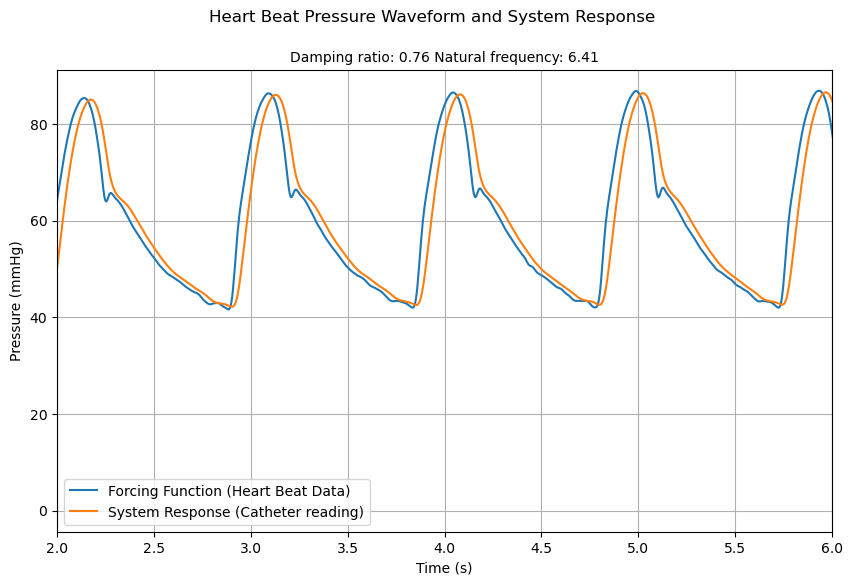

In [ ]:
# Define the second order system
omega_n = 2 * np.pi * natural_frequency # convert to rad/s from Hz
numerator = [omega_n**2]
denominator = [1, 2*damping_ratio*omega_n, omega_n**2]
system = lti(numerator, denominator)

# Simulate the system response
t_out, y_out, x_out = lsim(system, U=waveform, T=time)

# Plot the system response to the waveform
plt.figure(figsize=(10, 6))
plt.plot(time, waveform, label='Forcing Function (Heart Beat Data)')
plt.plot(t_out, y_out, label='System Response (Catheter reading)')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (mmHg)')
plt.title(f'Damping ratio: {damping_ratio} Natural frequency: {natural_frequency}', fontsize=10)
plt.suptitle('Heart Beat Pressure Waveform and System Response')
plt.xlim(2,6)
plt.legend()
plt.grid(True)
plt.show()

## Calculate and plot error

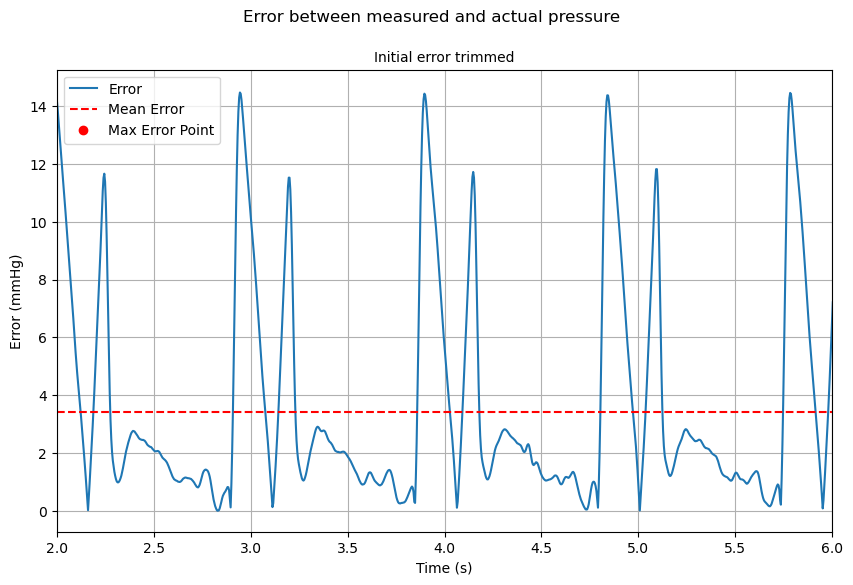

In [ ]:
# Calculate the errors
start_index = 100  # Adjust the start index as needed
errors = abs(y_out[start_index:] - waveform[start_index:])
max_error = np.max(np.abs(errors))
mean_error = np.mean(np.abs(errors))
max_error_index = np.argmax(np.abs(errors))  # Index of the maximum error

# Create a new figure for the error plot
plt.figure(figsize=(10, 6))

# Plot the error
plt.plot(time[start_index:], errors, label='Error')
plt.axhline(y=mean_error, color='r', linestyle='--', label='Mean Error')

# Highlight the maximum error point
plt.plot(time[max_error_index + start_index], errors[max_error_index], 'ro', label='Max Error Point')

# Set labels and title
plt.xlabel('Time (s)')
plt.ylabel('Error (mmHg)')
plt.suptitle('Error between measured and actual pressure')
plt.title('Initial error trimmed', fontsize=10)
plt.xlim(2,6)
plt.legend()
plt.grid(True)
plt.show()

# System response to sine wave

## User-defined inputs
Change the amplitude and frequency of the sine wave forcing function.

In [ ]:
# Parameters for system response to sine wave
user_frequency = 5  # User-defined input frequency in Hz
amplitude = 1  # User-defined input amplitude (Doesn't make a difference if this is changed)

## Code and output plot

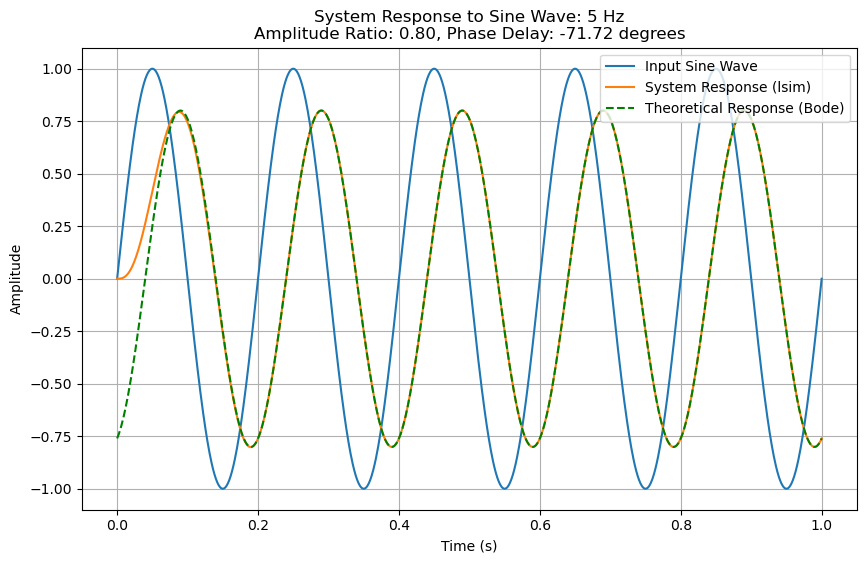

In [ ]:
# Generate the sine wave
t_sine = np.linspace(0, 1, 1000)  # middle number (upper limit) determines size of window
sine_wave = amplitude * np.sin(2 * np.pi * user_frequency * t_sine)

# Simulate the system response to the sine wave
t_response, y_response, _ = lsim(system, U=sine_wave, T=t_sine)

# Calculate amplitude ratio and phase delay from Bode plot
omega_user = 2 * np.pi * user_frequency  # Convert user frequency to rad/s
_, mag_user, phase_user = bode(system, [omega_user])
amplitude_ratio = 10**(mag_user[0] / 20)  # Convert dB to amplitude ratio
phase_delay = phase_user[0]  # In degrees

# Generate theoretical response using amplitude ratio and phase delay
phase_delay_rad = np.deg2rad(phase_delay)  # Convert phase delay to radians
theoretical_response = amplitude * amplitude_ratio * np.sin(2 * np.pi * user_frequency * t_sine + phase_delay_rad)

# Plot the sine wave and system response
plt.figure(figsize=(10, 6))
plt.plot(t_sine, sine_wave, label='Input Sine Wave')
plt.plot(t_response, y_response, label='System Response (lsim)')
plt.plot(t_sine, theoretical_response, 'g--', label='Theoretical Response (Bode)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'System Response to Sine Wave: {user_frequency} Hz\nAmplitude Ratio: {amplitude_ratio:.2f}, Phase Delay: {phase_delay:.2f} degrees')
plt.legend(loc='upper right')  # Move legend to the top right cornerplt.grid(True)
plt.grid(True)
plt.show()

# Bode plots


## Bode plot (rad/s x-axis)

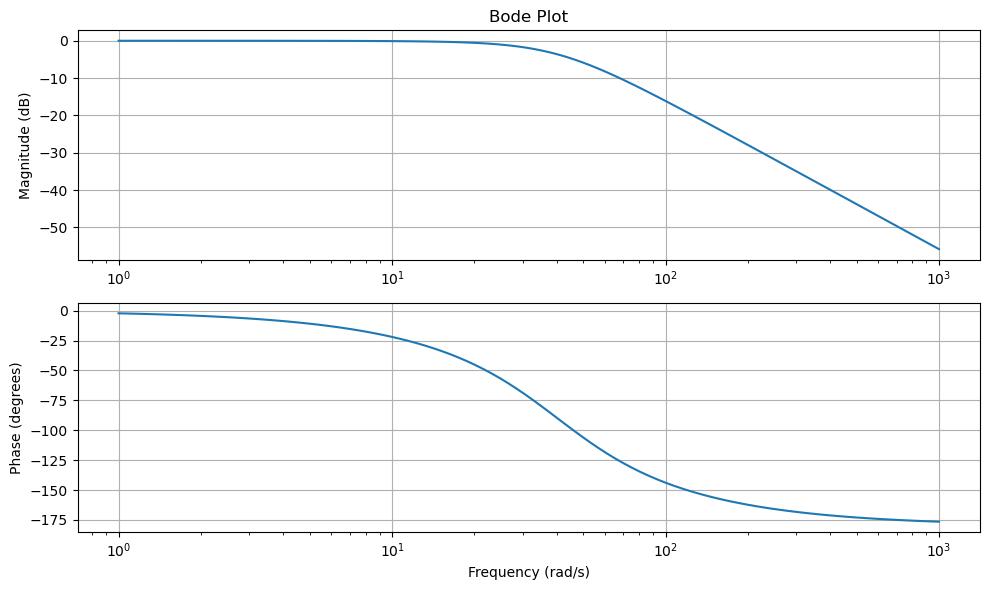

In [ ]:
# Generate Bode plot
w, mag, phase = bode(system)

# Convert the frequency axis to Hz
freq_hz = w / (2 * np.pi)

# Plot Bode magnitude
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.title('Bode Plot')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

# Plot Bode phase
plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase (degrees)')
plt.grid(True)

plt.tight_layout()
plt.show()

## Bode plot (Hz x-axis)

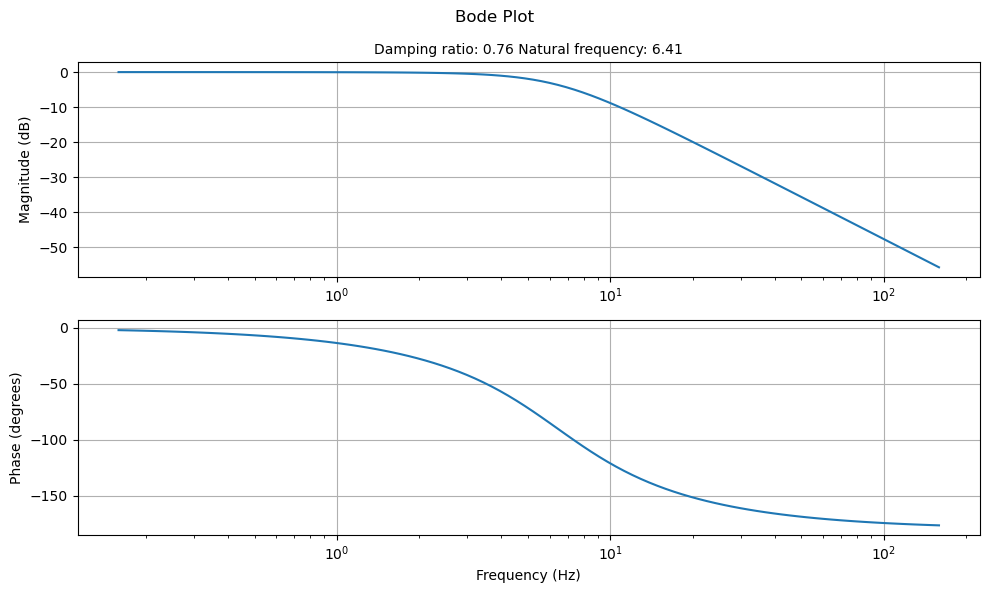

In [ ]:
# Plot Bode magnitude
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(freq_hz, mag)
plt.suptitle('Bode Plot')
plt.title(f'Damping ratio: {damping_ratio} Natural frequency: {natural_frequency}', fontsize=10)
plt.ylabel('Magnitude (dB)')
plt.grid(True)

# Plot Bode phase
plt.subplot(2, 1, 2)
plt.semilogx(freq_hz, phase)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(True)

plt.tight_layout()
plt.show()